# **Collecting the data**
# **Upload your image as Initials.jpg**

In [ ]:
from PIL import Image
import csv

def get_image_data(image_name: str, csv_name: str):
    """Read the black and white image.
    Put positions of black pixels in the csv file"""
    csv_name = 'data_points_' + image_name[:-4] + '.csv'
    print(f"Reading image: {image_name}")
    im = Image.open(image_name, 'r').convert('L')
    pix = im.load()
    width, height = im.size
    data_points = []
    for row_i in range(width):
        for col_i in range(height):
 
            pixel = pix[row_i, col_i]
            if pixel < 235:
                data_points.append((row_i, height - col_i))

    with open(csv_name, 'w', newline='') as f_handle:
        csv_writer = csv.writer(f_handle)
        csv_writer.writerow(('x', 'y'))
        for data in data_points:
            csv_writer.writerow(data)

    print(f'Total {len(data_points)} data points written to file.')

get_image_data('Initials.jpg', 'data.csv')

Reading image: Initials.jpg
Total 1054 data points written to file.


In [ ]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
import pandas as pd



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X = pd.read_csv('data_points_Initials.csv')
X['x']

0        4
1        4
2        4
3        4
4        4
        ..
1049    76
1050    76
1051    76
1052    76
1053    76
Name: x, Length: 1054, dtype: int64

In [ ]:
X['y']

0       552
1       551
2       550
3       549
4       539
       ... 
1049    540
1050    539
1051    538
1052    537
1053    536
Name: y, Length: 1054, dtype: int64

Text(0, 0.5, 'Height')

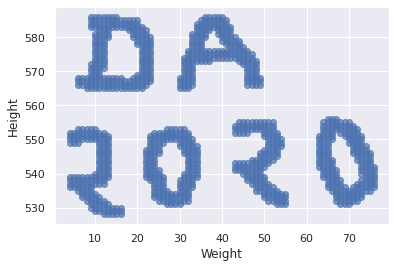

In [ ]:

plt.scatter(X['x'], X['y'], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')

# ***Spectral clustering using sklearn***

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
No handles with labels found to put in legend.


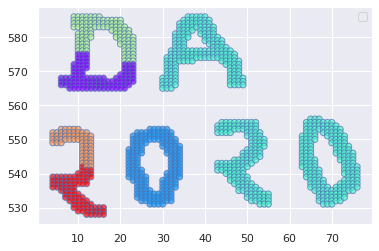

In [ ]:
sc = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X['x'], X['y'], c=sc_clustering.labels_, cmap='rainbow', alpha=.7, edgecolors='b')
plt.legend()
plt.show()

# **Without direct function**

In [ ]:
W = pairwise_distances(X, metric="euclidean")
print(W)


[[0.000 1.000 2.000 ... 73.348 73.546 73.756]
 [1.000 0.000 1.000 ... 73.164 73.348 73.546]
 [2.000 1.000 0.000 ... 72.993 73.164 73.348]
 ...
 [73.348 73.164 72.993 ... 0.000 1.000 2.000]
 [73.546 73.348 73.164 ... 1.000 0.000 1.000]
 [73.756 73.546 73.348 ... 2.000 1.000 0.000]]


In [ ]:
vectorizer = np.vectorize(lambda x: 1 if x < 2 and x!=0 else 0)
W = np.vectorize(vectorizer)(W)
print(W
      )

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


In [ ]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[3 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 4]]
laplacian matrix:
[[ 3 -1  0 ...  0  0  0]
 [-1  5 -1 ...  0  0  0]
 [ 0 -1  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  5 -1  0]
 [ 0  0  0 ... -1  5 -1]
 [ 0  0  0 ...  0 -1  4]]


In [ ]:
e, v = np.linalg.eigh(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-0.000 -0.000 0.000 ... 11.017 11.073 11.122]
eigenvectors:
[[0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 -0.000]
 [0.000 -0.000 0.000 ... -0.000 -0.000 -0.000]
 ...
 [0.000 0.000 -0.072 ... 0.000 0.000 0.000]
 [0.000 0.000 -0.072 ... 0.000 0.000 0.000]
 [0.000 0.000 -0.072 ... 0.000 0.000 0.000]]


In [ ]:
e1=e.copy()

In [ ]:
 e1.sort()
print(e1)

[-0.000 -0.000 0.000 ... 11.017 11.073 11.122]


In [ ]:
print(e)

[-0.000 -0.000 0.000 ... 11.017 11.073 11.122]


In [ ]:
k=6
s=[]
for i in range(k):
  for j in range(len(e)):
    if e[j] == e1[i]:
      s.append(e[j])
      exit

print(s)

[-1.5803094429914467e-15, -1.0095656011054522e-15, 1.5324910500610378e-17, 2.0416242920897545e-16, 2.724285218702376e-16, 2.966969374776822e-16]


In [ ]:
ev =[]
for i in s:
  for j in range(len(v)):
    if i == j:
      ev.append(v[j])

for i in ev:
  print('eigen')
  print(i)
  for j in i:
    print(j)


In [ ]:
np.where(e == np.partition(e, 1)[1])# the second smallest eigenvalue


(array([1]),)

In [ ]:
y_spec =v[:,1].copy()
y_spec[y_spec < 0] = 0
y_spec[y_spec > 0] = 1
type(y_spec)


numpy.ndarray

TypeError: ignored

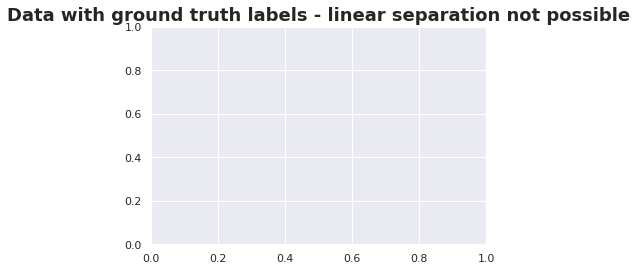

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X[:, 0], X[:, 1],c=y_spec )

In [ ]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

# ***Implementing K means***

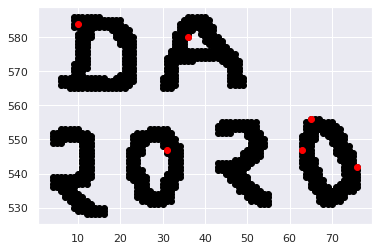

In [ ]:
K=6


# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["x"],X["y"],c='black')
plt.scatter(Centroids["x"],Centroids["y"],c='red')

plt.show()

In [ ]:
def calc_distance(X1, X2):
    d1=(int (X1[0])- int (X2[0]))**2
    d2=(int (X1[1])- int (X2[1]))**2
    d=np.sqrt(d1+d2)
    return d

In [ ]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for index, row in X.iterrows():
        distance=[]
        for index2, row2 in ic.iterrows():
            distance.append(calc_distance(row, row2))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [ ]:
get_centroids = findClosestCentroids(Centroids, X)
print(get_centroids)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
def calc_centroids(clusters, X):
    # new_centroids = []
    # new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
    #                   axis=1)
    # for c in set(new_df['cluster']):
    #     current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
    #     cluster_mean = current_cluster.mean(axis=0)
    #     new_centroids.append(cluster_mean)
    # return new_centroids

    Centroids_new = []
    X["Cluster"]=clusters
    Centroids_new = X.groupby(["Cluster"]).mean()[["x","y"]]
    return Centroids_new                                              

                 x           y
Cluster                       
0        72.000000  538.948980
1        36.565421  575.158879
2        14.080000  575.302857
3        22.710744  542.206612
4        66.108696  553.673913
5        55.930380  543.113924


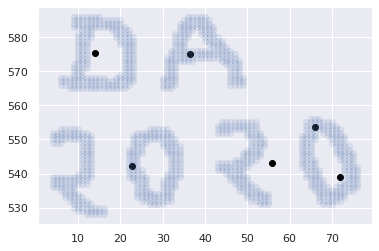

                 x           y
Cluster                       
0        70.571429  538.312500
1        38.759358  575.647059
2        15.273171  574.692683
3        19.749216  541.514107
4        67.558442  550.948052
5        49.883117  543.935065


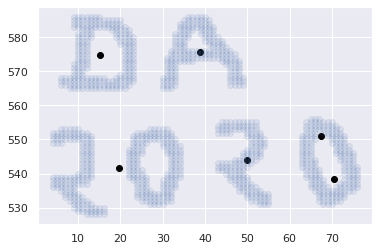

                 x           y
Cluster                       
0        70.355769  537.692308
1        38.759358  575.647059
2        15.273171  574.692683
3        19.476038  541.437700
4        67.791209  550.054945
5        48.740260  544.012987


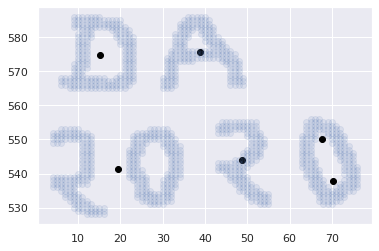

                 x           y
Cluster                       
0        70.390000  537.440000
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.863158  549.800000
5        48.080745  544.018634


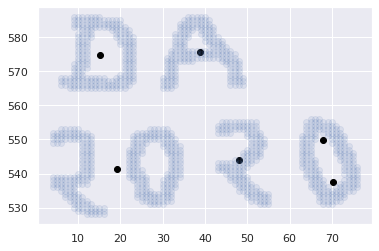

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


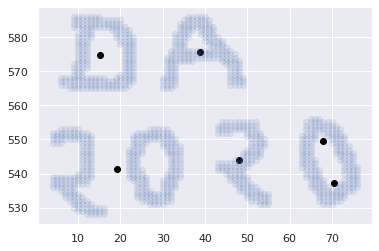

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


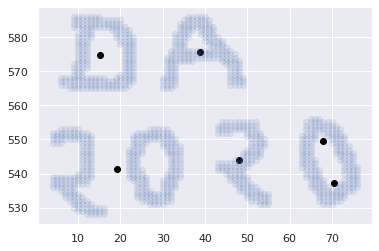

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


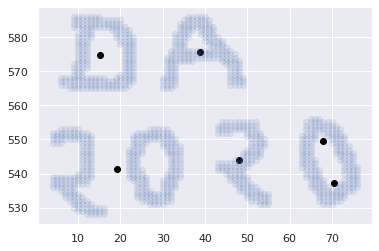

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


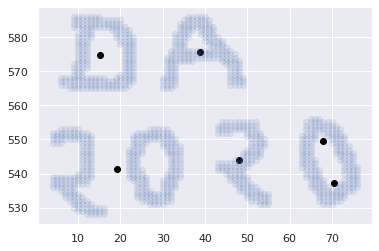

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


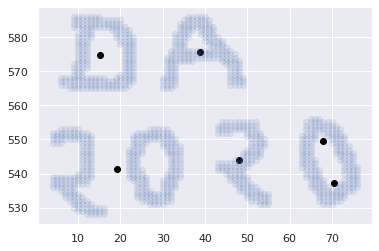

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


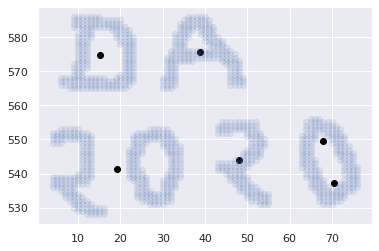

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


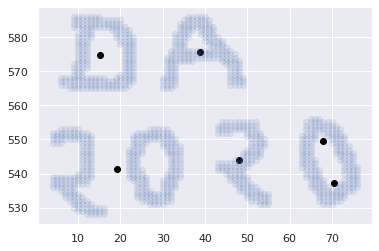

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


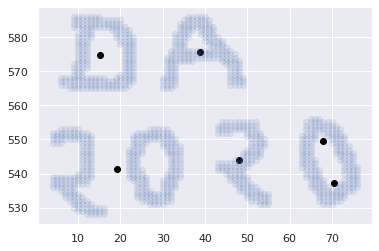

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


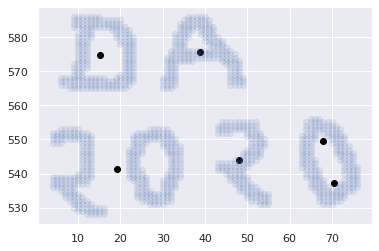

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


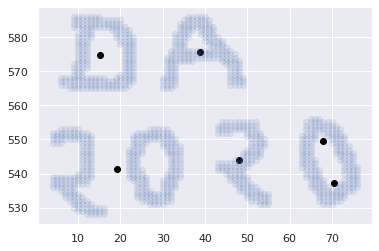

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


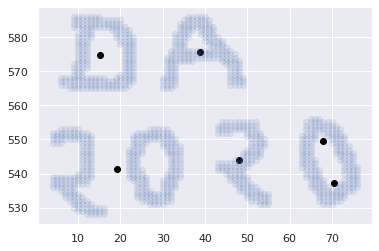

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


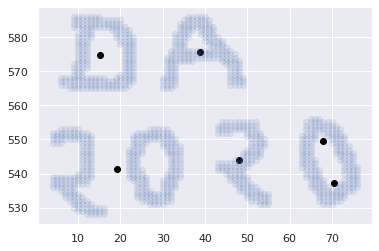

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


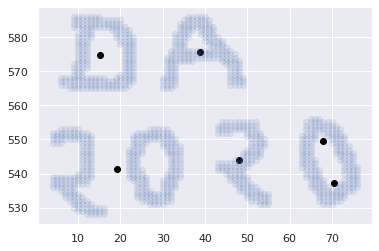

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


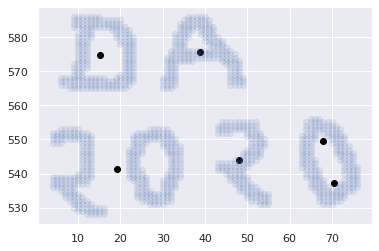

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


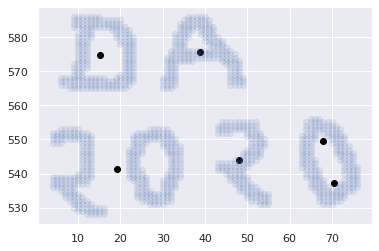

                 x           y
Cluster                       
0        70.468750  537.197917
1        38.759358  575.647059
2        15.273171  574.692683
3        19.153595  541.375817
4        67.888889  549.535354
5        48.080745  544.018634


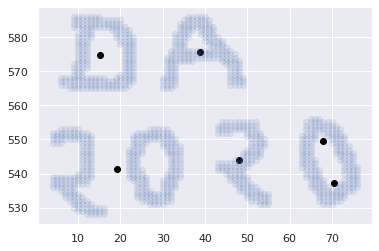

In [ ]:
for i in range(20):
    get_centroids = findClosestCentroids(Centroids, X)
    Centroids = calc_centroids(get_centroids, X)

    print(Centroids)


    plt.figure()
    plt.scatter(np.array(Centroids)[:, 0], np.array(Centroids)[:, 1], color='black')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.1)
    plt.show()

In [ ]:
type(Centroids)

pandas.core.frame.DataFrame

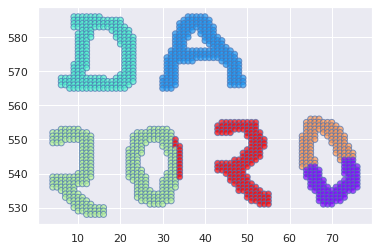

In [ ]:
plt.scatter(X['x'], X['y'], c=get_centroids, cmap='rainbow', alpha=.7, edgecolors='b')
plt.show()

# **K means using sklearn**

In [ ]:
kmeans = KMeans(n_clusters=6, init ='random' ,random_state=0).fit(X)
centroids = kmeans.labels_

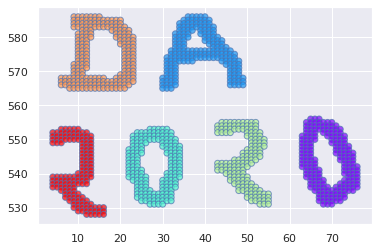

In [ ]:
plt.scatter(X['x'], X['y'], c=centroids, cmap='rainbow', alpha=.7, edgecolors='b')
plt.show()

# **Kmeans++ using sklearn**

In [ ]:
kmeansPP = KMeans(n_clusters=6, init ='k-means++' ,random_state=0).fit(X)
centroids = kmeansPP.labels_

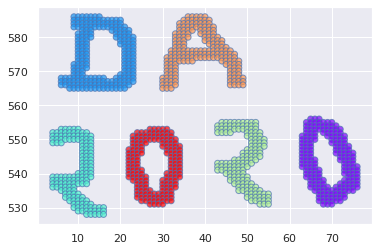

In [ ]:
plt.scatter(X['x'], X['y'], c=centroids, cmap='rainbow', alpha=.7, edgecolors='b')
plt.show()

# **Hierarichal clustering using sklearn**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6).fit(X)
centroids = clustering.labels_

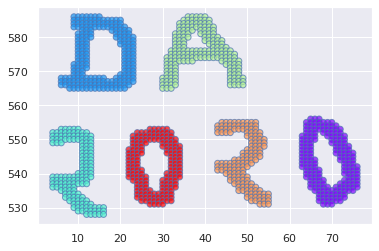

In [ ]:
plt.scatter(X['x'], X['y'], c=centroids, cmap='rainbow', alpha=.7, edgecolors='b')
plt.show()

# **Implementing K-means ++**

In [ ]:
import sys
k=6
data = X

# plt(data, np.array(centroids)) 

def distance(X1, X2): 
    d1=(int (X1[0])- int (X2['x']))**2
    d2=(int (X1[1])- int (X2['y']))**2
    d=np.sqrt(d1+d2)
    return d 

## compute remaining k - 1 centroids
def initialize(data, k): 
    centroids = [] 
    centroids.append((X.sample(n=1))) 
    for c_id in range(k - 1): 
          
        ## initialize a list to store distances of data 
        ## points from nearest centroid 
        dist = [] 
        for index, row in data.iterrows(): 
            point = row 
            d = 1000
              
            ## compute distance of 'point' from each of the previously 
            ## selected centroid and store the minimum distance 
            for j in range(len(centroids)): 
                temp_dist = distance(point, centroids[j]) 
                if d>temp_dist :
                  d = temp_dist
            dist.append(d) 
              
        ## select data point with maximum distance as our next centroid 
        dist = np.array(dist) 
        next_centroid = data[np.argmax(dist), :] 
        centroids.append(next_centroid) 
        dist = [] 
        plot(data, np.array(centroids)) 
    return centroids 

centroids = initialize(data, k) 

TypeError: ignored

In [ ]:
centroids = [] 
centroids.append((X.sample(n=1)))
type(centroids)
x=centroids[0]
x['x']


648    41
Name: x, dtype: int64

ValueError: ignored

In [ ]:
print(distance(data[5],centroids[2]))

KeyError: ignored

In [ ]:
data[5]

KeyError: ignored